# Classification Model for Titanic Survival Prediction

## Load the Dataset

### Import Packages

Let's start with the first step: Load the Dataset. We'll read the dataset file and display the first few rows to understand its structure.

In [ ]:
import numpy as np                 # Package for the mathematical process: vectors and matrices.
import pandas as pd                # Package for viewing tabular data.
import matplotlib.pyplot as plt    # Package for data vizualization.
import seaborn as sns              # Package for statistical graphs.

# Import Algorithm Models
from sklearn import svm, tree, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

# Import packages from sklearn.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import these packages so that I can load them from my computer.
from google.colab import files

uploaded = files.upload()   # It will prompt me to select the file.

Saving COMP1816_Titanic_Dataset_Classification.csv to COMP1816_Titanic_Dataset_Classification (1).csv


In [ ]:
# The file is now in Colab filesystem.
titanic_csv = pd.read_csv('COMP1816_Titanic_Dataset_Classification.csv')   # Save it to a Pandas DataFrame.

# The data elements are constructed already, so we are going to put the tabular into the "data=".
titanic_df = pd.DataFrame(data= titanic_csv)

## Explory Data Analysis (EDA)

This process is fundamental for understanding the patterns and relationships of the dataset. The analysis is related to passengers and their survival.

###Visualizing Data and get the information.

In [ ]:
# Display the data
display(titanic_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket No.,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0
1,2,1.0,NaN,female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1.0
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,S,0.0
886,887,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,S,1.0
887,888,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,S,0.0
888,889,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C,1.0


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       880 non-null    float64
 2   Name         885 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          715 non-null    float64
 5   SibSp        888 non-null    float64
 6   Parch        888 non-null    float64
 7   Ticket No.   888 non-null    object 
 8   Fare         888 non-null    float64
 9   Embarked     884 non-null    object 
 10  Survival     886 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 76.6+ KB


As we can notice in the table the maximum quantity of cells per column is 890, but in the other features there are missing values.

We can see that there are four categorical features:
* Name
* Sex
* Ticket No.
* Embarked

###Summary statistics for numerical features

In [ ]:
numerical_summary = titanic_df.describe(include='all')
numerical_summary

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket No.,Fare,Embarked,Survival
count,890.000000,880.000000,885,890,715.000000,888.000000,888.000000,888,888.000000,884,886.000000
unique,NaN,NaN,885,2,NaN,NaN,NaN,678,NaN,3,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S,NaN
freq,NaN,NaN,1,576,NaN,NaN,NaN,7,NaN,641,NaN
mean,445.500000,2.306818,NaN,NaN,33.734503,0.523649,0.382883,NaN,32.233107,NaN,0.386005
std,257.065167,0.836564,NaN,NaN,112.053437,1.104211,0.807113,NaN,49.760667,NaN,0.487107
min,1.000000,1.000000,NaN,NaN,-20.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,223.250000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.917700,NaN,0.000000
50%,445.500000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,0.000000
75%,667.750000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,1.000000


We can notice that there are some outliers. The Age for exaple has two outliers at min that shows -20 and at max that shows 3000.
A possible outlier can be at SibSp and Parch at the max, showing rispectively 8 and 6.

###Let's see how many categories have these features.

In [ ]:
print(titanic_df['Survival'].value_counts(),'\n')
print(titanic_df['Pclass'].value_counts(),'\n')
print(titanic_df['Embarked'].value_counts(),'\n')
print(titanic_df['Sex'].value_counts(),'\n')

Survival
0.0    544
1.0    342
Name: count, dtype: int64 

Pclass
3.0    484
1.0    214
2.0    182
Name: count, dtype: int64 

Embarked
S    641
C    168
Q     75
Name: count, dtype: int64 

Sex
male      576
female    314
Name: count, dtype: int64 



###Check for missing values

In [ ]:
missing_values = titanic_df.isnull().sum()
missing_values

,0
PassengerId,0
Pclass,10
Name,5
Sex,0
Age,175
SibSp,2
Parch,2
Ticket No.,2
Fare,2
Embarked,6


### Check for duplicated rows.

In [ ]:
#Find the number duplicate record
print('df - Number of duplicate Record:', titanic_df.duplicated().sum())

df - Number of duplicate Record: 0


In [ ]:
# Count of unique values for categorical features
categorical_summary = titanic_df.select_dtypes(include=['object', 'category']).nunique()
categorical_summary

,0
Name,885
Sex,2
Ticket No.,678
Embarked,3


### Survival distribution

([<matplotlib.patches.Wedge at 0x78411b9a90d0>,
 [Text(-0.3855731635849659, 1.0302103355737997, 'Did Not Survive'),
  Text(0.3855731635849653, -1.0302103355738002, 'Survived')],
 [Text(-0.21031263468270864, 0.5619329103129816, '61.4%'),
  Text(0.2103126346827083, -0.5619329103129818, '38.6%')])

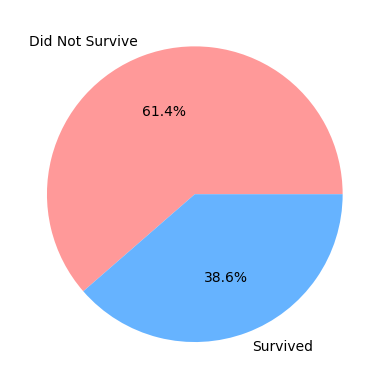

In [ ]:
survived = titanic_df['Survival'].value_counts()
plt.pie(survived, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])

Survived and not survived

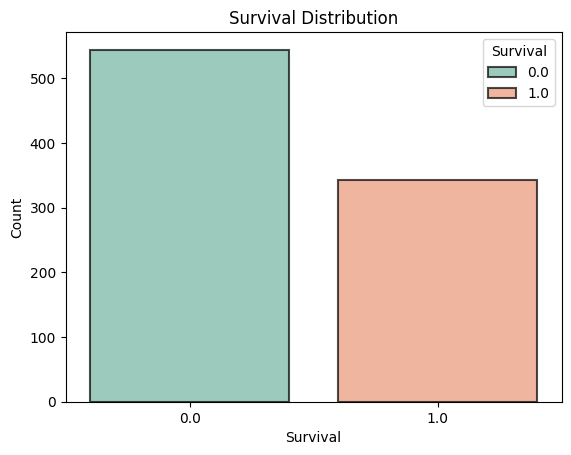

In [ ]:
# Analisys of survivals.
sns.countplot(x='Survival', data=titanic_df, palette='Set2', edgecolor='black', linewidth=1.5, color='red', alpha=0.7, hue='Survival')
plt.title('Survival Distribution')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

Pclass and Survival cerrelation

<ipython-input-21-931380bf54e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survival', data=titanic_df, palette='pastel', edgecolor='black', linewidth=1.5, alpha=0.7)


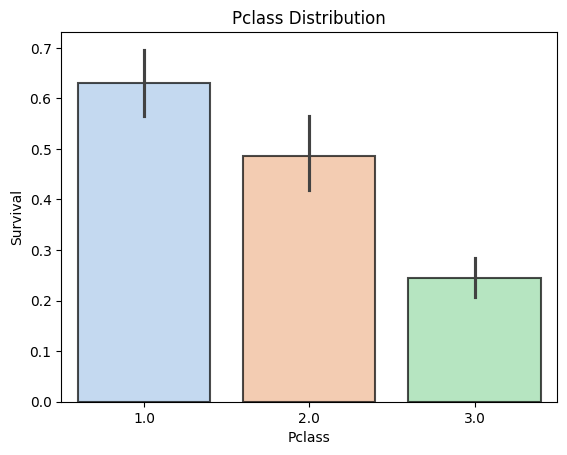

In [ ]:
# Pclass distribution
sns.barplot(x='Pclass', y='Survival', data=titanic_df, palette='pastel', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Survival')
plt.show()

Correlation of Sex and Survival

<ipython-input-22-c3b25c554f3a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survival', data=titanic_df, palette='pastel', edgecolor='black', linewidth=1.5, alpha=0.7)


<Axes: xlabel='Sex', ylabel='Survival'>

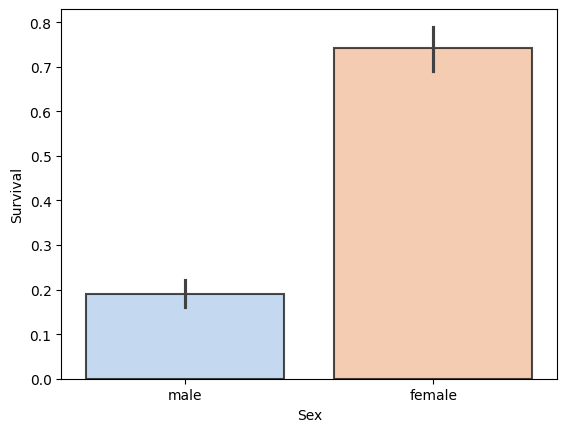

In [ ]:
sns.barplot(x='Sex', y='Survival', data=titanic_df, palette='pastel', edgecolor='black', linewidth=1.5, alpha=0.7)

Age and Survival cerrelation

<Axes: xlabel='AgeGroup', ylabel='Survival'>

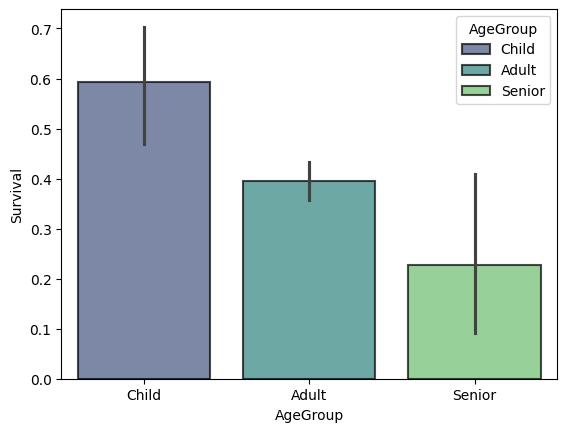

In [ ]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 10, 60, 100], labels=['Child', 'Adult', 'Senior'])
sns.barplot(x='AgeGroup', y='Survival', data=titanic_df, palette='viridis', edgecolor='black', linewidth=1.5, alpha=0.7, hue='AgeGroup')


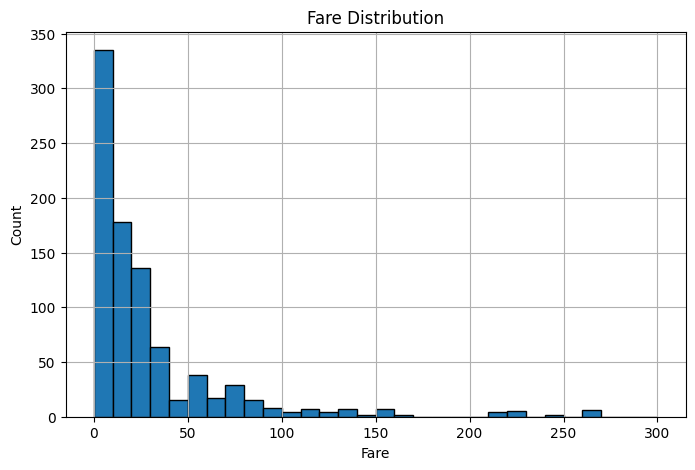

In [ ]:
# Plot 5: Fare Distribution
plt.figure(figsize=(8,5))
titanic_df['Fare'].hist(bins=30, edgecolor='black', range=(0, 300))  # Excluding extreme outliers
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

Correlation Graph

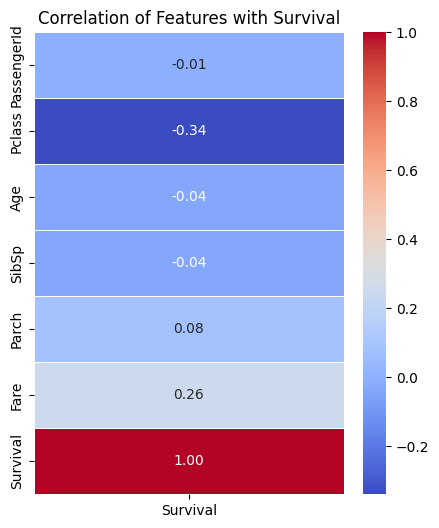

In [ ]:
# Compute correlation of "Survival" with other numerical features
# Compute correlation matrix for only numerical features
numerical_features = titanic_df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix_numerical = numerical_features.corr()
survival_correlation = correlation_matrix_numerical[['Survival']].dropna()

# Plot heatmap for correlation with "Survival"
plt.figure(figsize=(5,6))
sns.heatmap(survival_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Features with Survival')
plt.show()

### Combining existing features

Is it possible to create an extra feature that is the combination of two existing features.

We can see that we have two features describing the parental relationship 'SibSp' and 'Parch'.
We can create a family feature by adding both features.

## Pre-Porsessing Data

### Handle missing values

In [ ]:
# Fill missing values for numerical features with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df['Pclass'].fillna(titanic_df['Pclass'].mode()[0], inplace=True)
titanic_df['SibSp'].fillna(titanic_df['SibSp'].median(), inplace=True)
titanic_df['Parch'].fillna(titanic_df['Parch'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.dropna(subset=['Survival'], inplace=True)  # Drop rows where Survival is missing

<ipython-input-176-8e2f51ab3664>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-176-8e2f51ab3664>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

### Outliers

In [ ]:
# Handle outliers
titanic_df.loc[titanic_df['Age'] < 0, 'Age'] = np.nan  # Replace negative ages
titanic_df.loc[titanic_df['Age'] > 100, 'Age'] = np.nan  # Replace high ages
titanic_df['Age'] = titanic_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Check outliers.
negative_age_rows = titanic_df[titanic_df['Age'] < 0]
up_age_rows = titanic_df[titanic_df['Age'] > 100]

print(negative_age_rows[['PassengerId', 'Name', 'Age', 'Pclass', 'Sex']])
print(up_age_rows[['PassengerId', 'Name', 'Age', 'Pclass', 'Sex']])

Empty DataFrame
Columns: [PassengerId, Name, Age, Pclass, Sex]
Index: []
Empty DataFrame
Columns: [PassengerId, Name, Age, Pclass, Sex]
Index: []


### Feature Engineering

In [ ]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.drop(columns=['SibSp', 'Parch'], inplace=True)

# slplit sex feature into two columns called male and female
titanic_df[['Male', 'Female']] = titanic_df['Sex'].str.get_dummies()
titanic_df.drop('Sex', axis=1, inplace=True)

# Categorize Age into groups and create separate features
titanic_df['Baby'] = ((titanic_df['Age'] <= 2).astype(str))
titanic_df['Young'] = ((titanic_df['Age'] > 2) & (titanic_df['Age'] <= 18)).astype(str)
titanic_df['Adult'] = ((titanic_df['Age'] > 18) & (titanic_df['Age'] <= 60)).astype(str)
titanic_df['Old'] = ((titanic_df['Age'] > 60)).astype(str)
titanic_df.drop(columns=['Age'], inplace=True)

In [ ]:
display(titanic_df)

,PassengerId,Pclass,Name,Ticket No.,Fare,Embarked,Survival,FamilySize,Male,Female,Baby,Young,Adult,Old
0,1,3.0,"Braund, Mr. Owen Harris",A/5 21171,7.2500,S,0.0,2.0,0,1,False,False,True,False
1,2,1.0,NaN,PC 17599,71.2833,C,1.0,2.0,1,0,False,False,True,False
2,3,3.0,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,S,1.0,1.0,1,0,False,False,True,False
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,S,1.0,2.0,1,0,False,False,True,False
4,5,3.0,"Allen, Mr. William Henry",373450,8.0500,S,0.0,1.0,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,2.0,"Montvila, Rev. Juozas",211536,13.0000,S,0.0,1.0,0,1,False,False,True,False
886,887,1.0,"Graham, Miss. Margaret Edith",112053,30.0000,S,1.0,1.0,1,0,False,False,True,False
887,888,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,23.4500,S,0.0,4.0,1,0,False,False,True,False
888,889,1.0,"Behr, Mr. Karl Howell",111369,30.0000,C,1.0,1.0,0,1,False,False,True,False


In [ ]:
#Drop unnecessary columns
titanic_df.drop(['Name', 'Ticket No.', 'PassengerId'], axis=1, inplace=True)

# Define features
num_features = ['Fare', 'FamilySize']
cat_features = ['Embarked', 'Pclass', 'Baby', 'Young', 'Adult', 'Old']

# Create transformations:
# N.1
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# N.2
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# N.3
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

### Splitting Dataset.

In [ ]:
# Split dataset
test_size = 140  # Last 140 datapoints for test set
X = titanic_df.drop(columns=['Survival'])
y = titanic_df['Survival']
X_train_val = X.iloc[:-test_size]
y_train_val = y.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_test = y.iloc[-test_size:]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

### Convert data into arrays

In [ ]:
# Convert data into arrays.
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

In [ ]:
# transform into np.array
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

##Model Selection

## Logistic Regression

### Hyperparameter Tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with 'l1' and 'l2' penalties
}

In [ ]:
# Logistic Regression model
log_reg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Training the model
log_reg_pipe.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg_pipe.predict(X_test)

# Evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy_lr)
print("Confusion Matrix", conf_matrix)
print("Report: ", class_report)

ValueError: Specifying the columns using strings is only supported for dataframes.

###Ptot Conf Matrix

In [ ]:
# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Find the best parameters and the best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

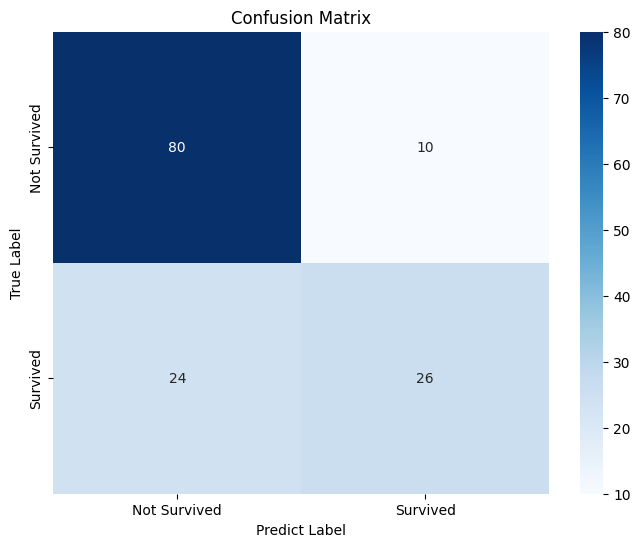

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report

'              precision    recall  f1-score   support\n\n         0.0       0.77      0.89      0.82        90\n         1.0       0.72      0.52      0.60        50\n\n    accuracy                           0.76       140\n   macro avg       0.75      0.70      0.71       140\nweighted avg       0.75      0.76      0.75       140\n'

In [ ]:
# Plot graph for logistic regression


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Initialize the Logistic Regression classifier with the best parameters
lr_optimized = LogisticRegression(C=best_parameters['C'], penalty=best_parameters['penalty'], solver=best_parameters['solver'], max_iter=1000, random_state=42)

# Train the optimized classifier on the specific training set
lr_optimized.fit(X_train, y_train)

# Predict on the specific test set
y_pred_lr_optimized = lr_optimized.predict(X_test)

# Evaluate the optimized model on the specific test set
accuracy_lr_optimized = accuracy_score(y_test, y_pred_lr_optimized)
classification_report_output_lr_optimized = classification_report(y_test, y_pred_lr_optimized)

accuracy_lr_optimized

0.7285714285714285

In [ ]:
classification_report_output_lr_optimized

'              precision    recall  f1-score   support\n\n         0.0       0.73      0.91      0.81        90\n         1.0       0.71      0.40      0.51        50\n\n    accuracy                           0.73       140\n   macro avg       0.72      0.66      0.66       140\nweighted avg       0.73      0.73      0.71       140\n'

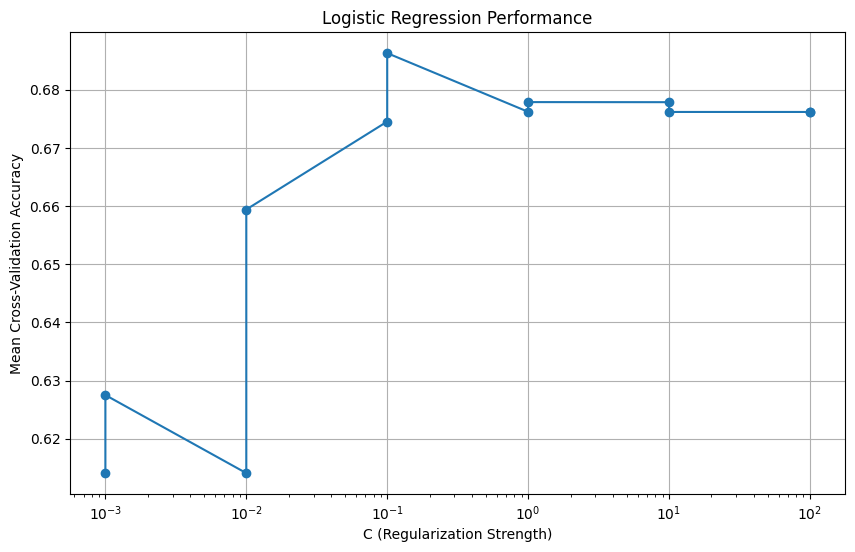

In [ ]:
# Extract the mean cross-validation scores
mean_scores = grid_search.cv_results_['mean_test_score']

# Extract the parameter 'C' values tested
C_values = [param['C'] for param in grid_search.cv_results_['params']]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_scores, marker='o')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Logistic Regression Performance')
plt.xscale('log')  # Because we're using a wide range of C values
plt.grid(True)
plt.show()

In [ ]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
# Predict the class labels for the points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.35, cmap = 'bwr')
X_neg = X_test[y_test==0, :]
X_pos = X_test[y_test==1, :]
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='blue', edgecolors='black', label='Benign')
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='red', edgecolors='black', label='Malignant')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title(f'Logistic Regression Classifier on Breast Cancer Dataset (Test)')
plt.legend()
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

##Decision Tree

Ask a series of YES/NO questions about data

##Hyper-parameter

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with 'l1' and 'l2' penalties
}

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Find the best parameters and the best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.6862745098039216)

In [ ]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the specific training set
dt_classifier.fit(X_train, y_train)

# Predict on the specific test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model on the specific test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_output_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Accuracy: ", accuracy_dt)
print("Class Report: ", classification_report_output_dt)

Accuracy:  0.7571428571428571
Class Report:                precision    recall  f1-score   support

         0.0       0.75      0.92      0.83        90
         1.0       0.77      0.46      0.57        50

    accuracy                           0.76       140
   macro avg       0.76      0.69      0.70       140
weighted avg       0.76      0.76      0.74       140



###Ptot Conf Matrix

In [ ]:
conf_matrix_dt

array([[83,  7],
       [27, 23]])

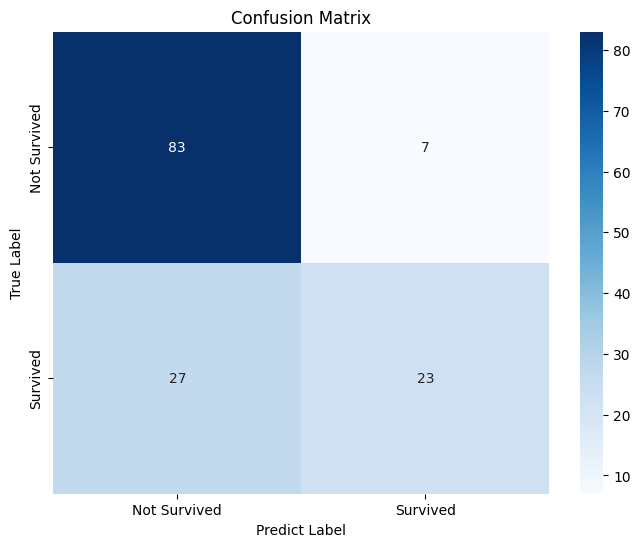

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
classification_report_output_dt

'              precision    recall  f1-score   support\n\n         0.0       0.75      0.92      0.83        90\n         1.0       0.77      0.46      0.57        50\n\n    accuracy                           0.76       140\n   macro avg       0.76      0.69      0.70       140\nweighted avg       0.76      0.76      0.74       140\n'

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, rounded=True, class_names=True, feature_names=['Pclass', 'Sex',	'Age', 'SibSp',	'Parch',	'Fare',	'Embarked',	'Survival'])

plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 2000x1000 with 0 Axes>

## Random Forest Classifier

Will help with Overfitting

##Hyper-parameter

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with 'l1' and 'l2' penalties
}

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Find the best parameters and the best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.8034177090515119)

In [ ]:
# Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100)

# Training the model
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy: ", accuracy_rf)
print("Confusion Matrix: ", conf_matrix_rf)
print("Class Report: ", class_report_rf)

Accuracy:  0.7571428571428571
Confusion Matrix:  [[82  8]
 [26 24]]
Class Report:                precision    recall  f1-score   support

         0.0       0.76      0.91      0.83        90
         1.0       0.75      0.48      0.59        50

    accuracy                           0.76       140
   macro avg       0.75      0.70      0.71       140
weighted avg       0.76      0.76      0.74       140



In [ ]:
conf_matrix_rf

array([[82,  8],
       [26, 24]])

###Ptot Conf Matrix

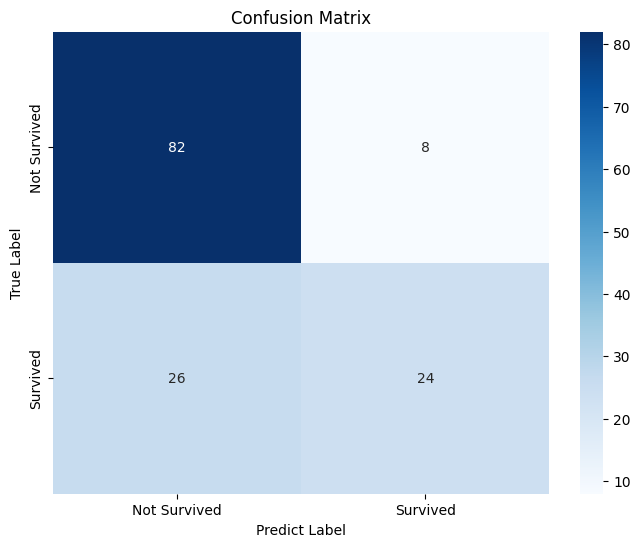

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report_rf

'              precision    recall  f1-score   support\n\n         0.0       0.76      0.91      0.83        90\n         1.0       0.75      0.48      0.59        50\n\n    accuracy                           0.76       140\n   macro avg       0.75      0.70      0.71       140\nweighted avg       0.76      0.76      0.74       140\n'

##Model Evaluation

###Evaluation

In [ ]:
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Log. Regress. Optimized', 'Decision Tree', 'Random Forest'],
                       'Score' : [accuracy_lr, accuracy_lr_optimized, accuracy_dt, accuracy_rf]})

models.sort_values(by='Score', ascending=True)

,Model,Score
1,Log. Regress. Optimized,0.728571
0,Logistic Regression,0.757143
2,Decision Tree,0.757143
3,Random Forest,0.757143
